# Image Segmentation Prediction with Seamless Stitching - MaskRCNN

This notebook shows how to use pre-trained Mask R-CNN model to do prediction on your own dataset.

# Load Library

In [1]:
#import stitching file
from mrcnn.main import *
from mrcnn.utils import *
from mrcnn.stitch import *
# Set path to Mask RCNN folder
ROOT_DIR = os.path.abspath("/home/ubuntu/github/MaskRCNN")
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
from mrcnn.config import Config

Using TensorFlow backend.


# Load pretrained weights

In [2]:
model_path = '../../../Projects/Segmentation/Mask-RCNN_cell/pre_train/cell20200115T2302_lung_panel2018_24image.h5'

# Configuration for the Prediction and Load Model

Important Parameters:  
    `DETECTION_MAX_INSTANCES`: max number of cells can be predicted in the image  
    `RPN_ANCHOR_SCALES`: Size of target cells
    
Initialization `init()` Signature:  
    
```python
init(MODEL_PATH,
     POST_NMS_ROIS_INFERENCE_in=5000, 
     DETECTION_MAX_INSTANCES_in = 1000, 
     DETECTION_MIN_CONFIDENCE_in=0.7,
     DETECTION_NMS_THRESHOLD_in=0.2, 
     GPU_COUNT_in=1): 
```

In [3]:
#Load Model
model = init(model_path)

DETECTION_MAX_INSTANCES_in: 1000


# Prediction on Image

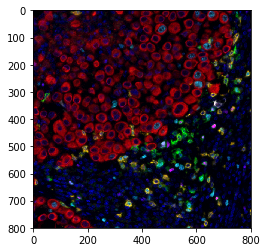

In [4]:
#Load Sample Image
img = si.imread("../../Vinci_github/data/RGB_2/Sample1 _[x1,y1]_component_data.png").astype(np.uint8)
testImg = img[:800, :800]
plt.figure()
plt.imshow(testImg)

## Stitch Image

**Global Parameters to Set:**

* OVERLAP (Default=64)
* WINDOW (Default=576)  

*If these are not explicitly declared, default values will be used*

**Main Functions:**

```python
    stitch_predict(  
    img,  (x,y,1) or (x,y,3) image  
    name="output.json"  
    model=False,  - If False, Mask R-CNN model will be initialized within function, otherwise use outer scope model  
    modelVar=None, - If model is True, must provide modelVar; modelVar is output of init()  
    WINDOW=576,  
    OVERLAP=64,  
    check_overlap=False, - Removes step to remove overlapping predictions (Very time consuming)
    MIN_AREA=15,- If cells have area smaller than this, it will be deleted  
    PADDING=10, - Stitching Parameter  
    POST_NMS_ROIS_INFERENCE=5000 - Mask R-CNN Parameter
    MODEL_PATH = '' - Path to Mask-RCNN Model required if model=False
    )
```
saves image to JSON file with name in current directory, and returns dictionary variable of json file.  
If `check_overlap=True`, will also return a .tiff image file with instance prediction sorted by cell instance id ranked by prediction score.

**Constraints:**

* For image with shape (x,y), stitching will only be used on images where $x >$ WINDOW and $y >$ WINDOW. Otherwise, it is fed in as a single image.

**Known Problems:**

* It has been observed that there are infrequent errors where the NumpyEncoder for .json files is unable to write properly. If this happens, change the WINDOW size and try again. Note that it is recommend for (WINDOW + OVERLAP) to be a multiple of 64.
* We have implemented the `remove_overlap` function which removes overlapping segmentation based on ranking of prediction confidence based on [the Mask-RCNN source code](https://github.com/matterport/Mask_RCNN/blob/master/samples/nucleus/nucleus.py). It has been observed that this function does not remove all overlaps, particularly at edges, but removes majority of overlaps. 

In [5]:
#Declare Global Parameters (Optional if use Default)
OVERLAP = 96
WINDOW = 384

In [6]:
img = stitch_predict(testImg, name="output_test.json", model=True, modelVar=model, check_overlap=0, OVERLAP=OVERLAP, WINDOW=WINDOW)

## Compare Normal Stitching with Seamless Stitching

In [7]:
normal_stitch_img = normal_stitch(testImg,model=model, check_overlap=0, OVERLAP=OVERLAP, WINDOW=WINDOW)

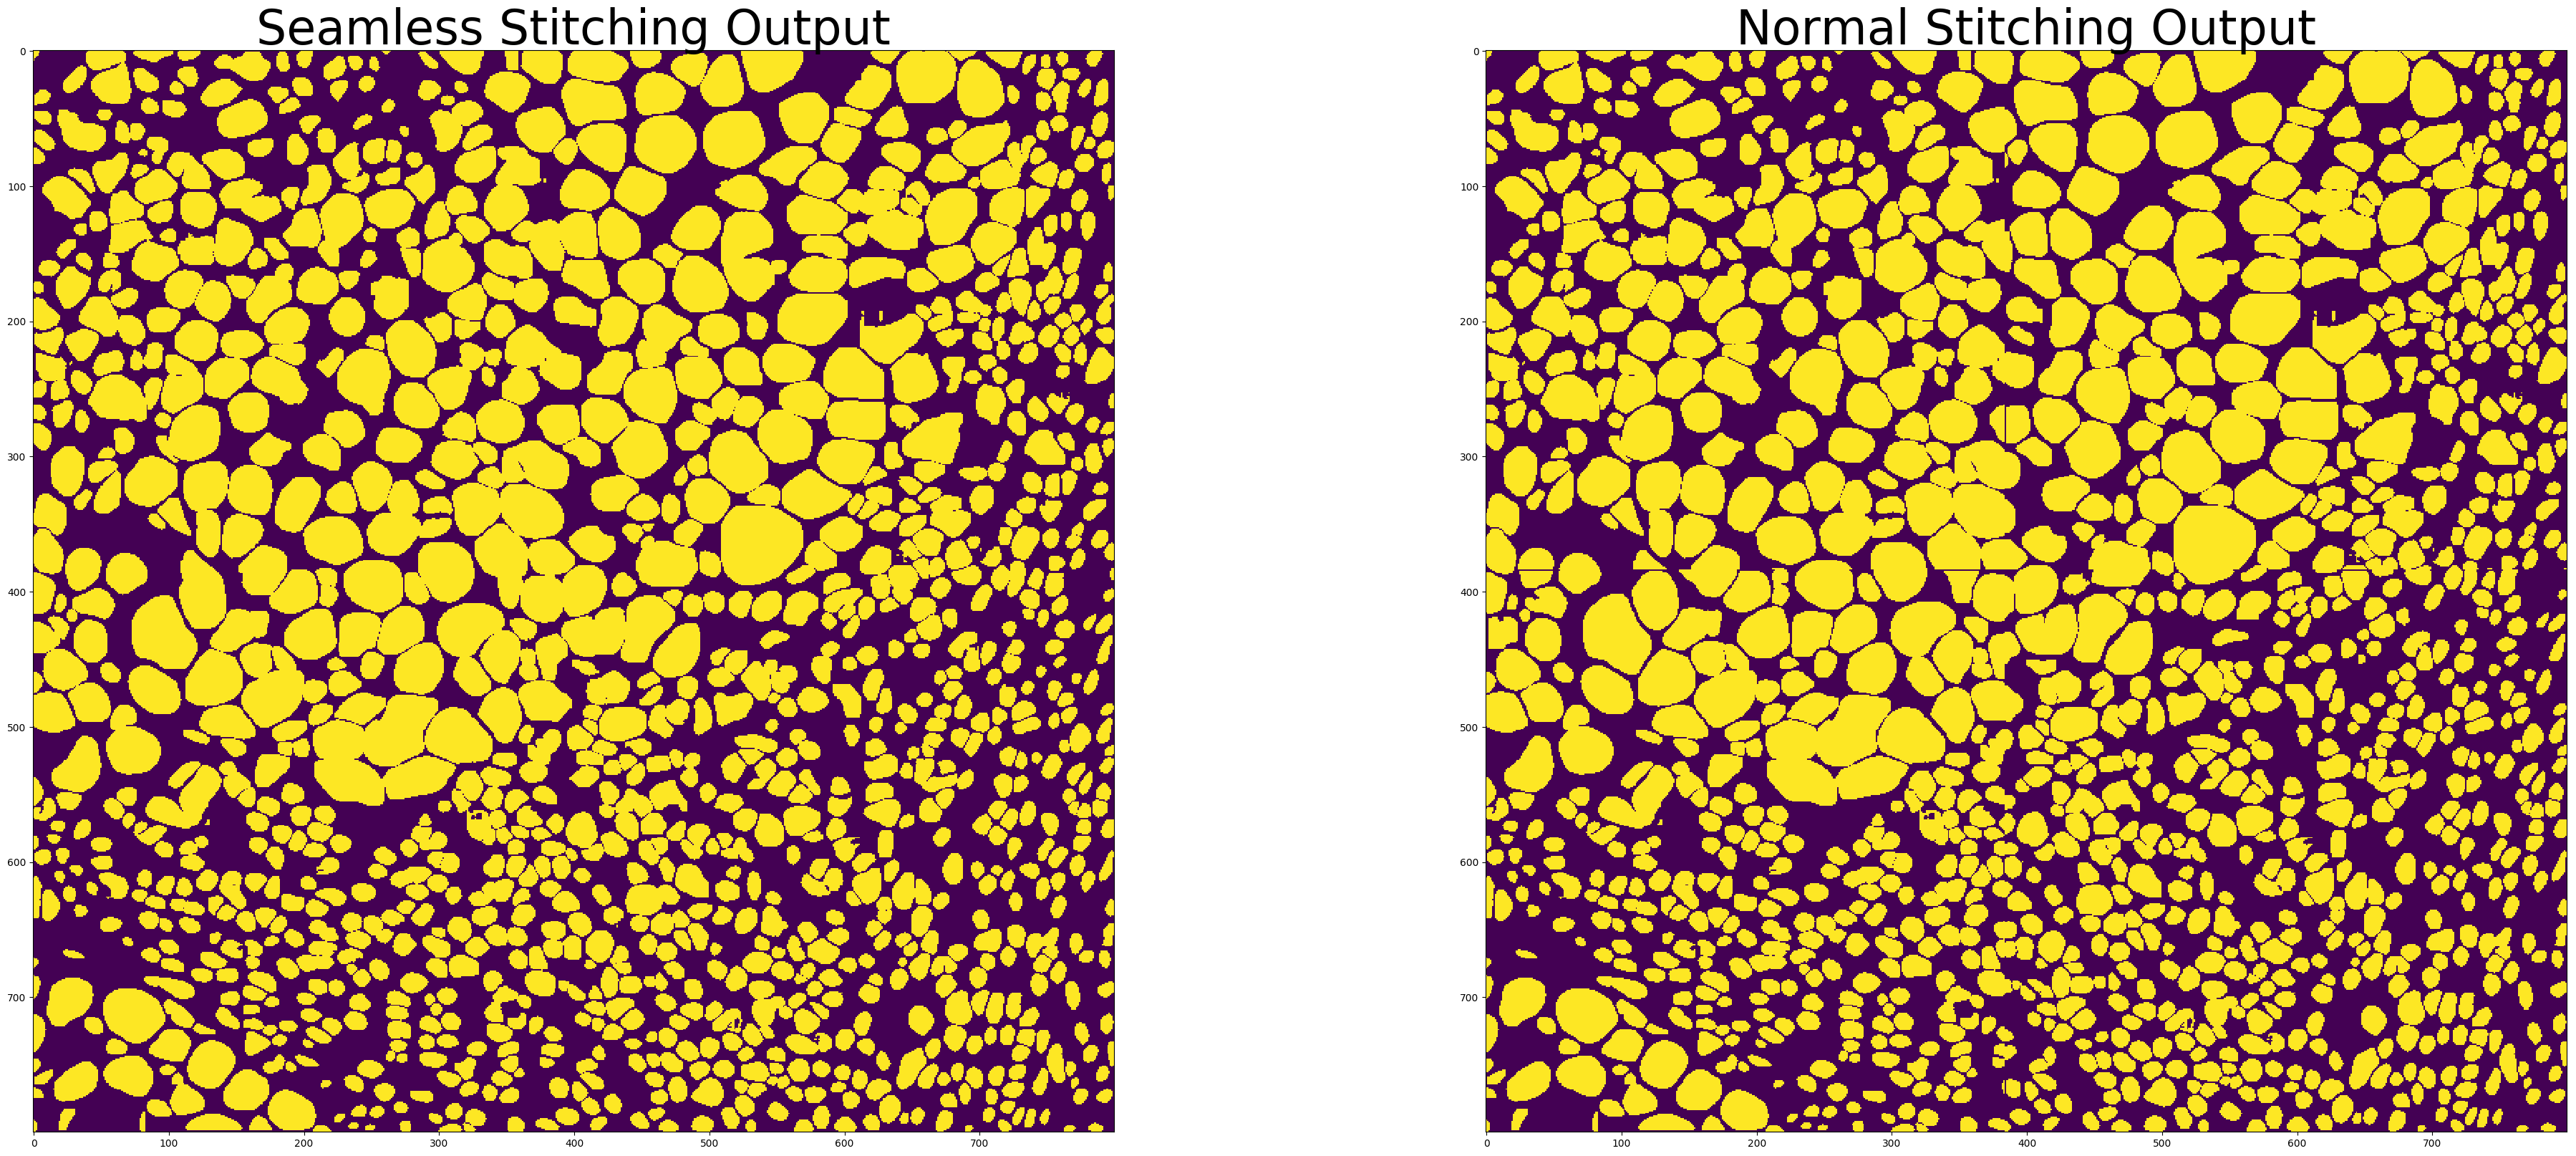

In [8]:
plt.figure(figsize=(48,20),dpi=100)
seamless_stitch_img = overlay(img)
plt.subplot(1, 2, 1)
plt.title("Seamless Stitching Output",fontsize=48)
plt.imshow(seamless_stitch_img)
plt.subplot(1, 2, 2)
plt.title("Normal Stitching Output",fontsize=48)
plt.imshow(normal_stitch_img)
